---

# Topic Modeling (Prepare)

On Monday we talked about summarizing your documents using just token counts. Today, we're going to learn about a much more sophisticated approach - learning 'topics' from documents. Topics are a latent structure. They are not directly observable in the data, but we know they're there by reading them.

> **latent**: existing but not yet developed or manifest; hidden or concealed.

## Use Cases
Primary use case: what the hell are your documents about? Who might want to know that in industry - 
* Identifying common themes in customer reviews
* Discovering the needle in a haystack 
* Monitoring communications (Email - State Department) 

## Learning Objectives
*At the end of the lesson you should be able to:*
* Part 0: Warm-Up
* Part 1: Describe how an LDA Model works
* Part 2: Estimate a LDA Model with Gensim
* Part 3: Interpret LDA results & Select the appropriate number of topics

# Part 0: Warm-Up
How do we do a grid search? 

In [55]:
!pip install -U pandas-profiling
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

  Using cached pydantic-1.8.2-cp37-cp37m-macosx_10_9_x86_64.whl (2.6 MB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.7.4
    Uninstalling pydantic-1.7.4:
      Successfully uninstalled pydantic-1.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.0.3 requires pydantic<1.8.0,>=1.7.1, but you have pydantic 1.8.2 which is incompatible.
spacy 3.0.6 requires pydantic<1.8.0,>=1.7.1, but you have pydantic 1.8.2 which is incompatible.


In [4]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

# pd.reset_option('^display.', silent=True)

/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# Dataset
# categories = ['sci.electronics',
#               'rec.sport.baseball',
#               'rec.sport.hockey']

# Load training data
newsgroups_train = fetch_20newsgroups(subset='train', 
                                      remove=('headers', 'footers', 'quotes'))

# Load testing data
newsgroups_test = fetch_20newsgroups(subset='test', 
                                     remove=('headers', 'footers', 'quotes'))

print(f'Training Samples: {len(newsgroups_train.data)}')
print(f'Testing Samples: {len(newsgroups_test.data)}')

/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Training Samples: 11314
Testing Samples: 7532


In [58]:
newsgroups_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [59]:
newsgroups_train['data'][0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

### GridSearch on Just Classifier
* Fit the vectorizer and prepare BEFORE it goes into the gridsearch

In [60]:
newsgroups_train.data[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [61]:
# create tfidf instant
vect1 = TfidfVectorizer()
# transform data
X_train = vect1.fit_transform(newsgroups_train.data)
print(X_train.shape)

# create parameter dict
p1 = {
    'n_estimators': [10, 50],
     'max_depth': [None, 10]
}

y = newsgroups_train.target
# create model instance 
clf = RandomForestClassifier()
# instantiate a grid search object
gs1 = GridSearchCV(clf, p1, cv=5, n_jobs=-1, verbose=1)
# fit
gs1.fit(X_train, y)
# predict


# optimize model parameters


(11314, 101631)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    3.4s remaining:   30.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [62]:
gs1.best_params_

{'max_depth': None, 'n_estimators': 50}

In [63]:
gs1.best_score_

0.6139293825672908

In [64]:
# creat and transform a sample text
sample_vect = vect1.transform(['The yankees are the best team in baseball']) 
print(sample_vect.shape)

# use the model to classify the sample text 
gs1.predict(sample_vect)


(1, 101631)


array([9])

In [65]:
newsgroups_train['target_names'][9]

'rec.sport.baseball'

In [66]:
dir(newsgroups_train)

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [67]:
y = newsgroups_train['target']
y.shape

(11314,)

In [68]:
p1 = {
    'n_estimators': [10, 50],
    'max_depth': [None, 10]
}

clf = RandomForestClassifier()
gs1 = GridSearchCV(clf, p1, cv=5, n_jobs=-1, verbose=1)
gs1.fit(X_train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    0.6s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   21.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [69]:
gs1.best_params_

{'max_depth': None, 'n_estimators': 50}

In [70]:
gs1.best_score_

0.6095995511540943

In [71]:
# create and tranform a sample text 
sample_vec = vect1.transform(['The yankees are the best team in baseball'])
print(sample_vec.shape)

# use the model to classify the sample text 
gs1.predict(sample_vec)

(1, 101631)


array([9])

In [72]:
newsgroups_train['target_names'][9]

'rec.sport.baseball'

### GridSearch with BOTH the Vectoizer & Classifier

In [73]:
from sklearn.pipeline import Pipeline

# create tfidf instance

# create model instance 

# Create a pipline instance using tfidf and your model 
pipeline = Pipeline([
    ('vect', vect1),
    ('clf', clf)
])


# create parameter dict

p2 = {
    'vect__stop_words': (None, 'english'),
    'vect__min_df': (2, 5),
    'clf__max_depth': (20, None)
}

# instantiate a grid search object
gs2 = GridSearchCV(pipeline, p2, cv=5, n_jobs=-1, verbose=1)
gs2.fit(newsgroups_train['data'], newsgroups_train['target'])
# optimize model parameters


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   40.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [74]:
gs2.best_params_

{'clf__max_depth': None, 'vect__min_df': 2, 'vect__stop_words': 'english'}

In [75]:
gs2.best_score_

0.6612156581894647

In [76]:
# pass a raw text sample into the optimized model in order to classify it
gs2.predict(['The yankees are the best team in baseball'])

array([9])

In [77]:
from sklearn.pipeline import Pipeline

# create tfidf instance

# create model instance 

# Create a pipline instance using tfidf and your model 

# create parameter dict

# instantiate a grid search object

# optimize model parameters

pipeline = Pipeline([
    ('vect', vect1),
    ('clf', clf)
])

p2 = {
    'vect__stop_words': (None, 'english'),
    'vect__min_df': (2, 5),
    'clf__max_depth': (20, None)
}

gs2 = GridSearchCV(pipeline, p2, cv=5, n_jobs=-1, verbose=1)
gs2.fit(newsgroups_train['data'], newsgroups_train['target'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   41.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [78]:
gs2.best_params_

{'clf__max_depth': None, 'vect__min_df': 2, 'vect__stop_words': 'english'}

In [79]:
gs2.best_score_

0.6610387063173264

In [80]:
# pass a raw text sample into the optimized model in order to classify it
gs2.predict(['The yankees are the best team in baseball'])

array([9])

Advantages to using GS with the Pipe:
* Allows us to make predictions on raw text increasing reproducibility. :)
* Allows us to tune the parameters of the vectorizer along side the classifier. :D 

# Part 1: Describe how an LDA Model works

[Your Guide to Latent Dirichlet Allocation](https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d)

[LDA Topic Modeling](https://lettier.com/projects/lda-topic-modeling/)

[Topic Modeling with Gensim](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)

In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Download spacy model
# import spacy.cli
# spacy.cli.download("en_core_web_md")

# !pip install pyLDAvis
# !pip install pyLDAvis.gensim
import pyLDAvis
# import pyLDAvis.gensim 

import re
import numpy as np
import pandas as pd
from pprint import pprint

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy


import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer



/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:169: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-

In [3]:
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer


# Dataset
# categories = ['sci.electronics',
#               'rec.sport.baseball',
#               'rec.sport.hockey']

# Load training data
newsgroups_train = fetch_20newsgroups(subset='train', 
                                      remove=('headers', 'footers', 'quotes'))

# Load testing data
newsgroups_test = fetch_20newsgroups(subset='test', 
                                     remove=('headers', 'footers', 'quotes'))

print(f'Training Samples: {len(newsgroups_train.data)}')
print(f'Testing Samples: {len(newsgroups_test.data)}')

Training Samples: 11314
Testing Samples: 7532


In [5]:
df = pd.DataFrame({
    'content': newsgroups_train['data'],
    'target': newsgroups_train['target'],
    'target_names': [newsgroups_train['target_names'][i] for i in newsgroups_train['target']]
})
print(df.shape)
display(df.head())

(11314, 3)


,content,target,target_names
0,I was wondering if anyone out there could enli...,7,rec.autos
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware
3,\nDo you have Weitek's address/phone number? ...,1,comp.graphics
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space


In [6]:
pd.set_option('display.max_colwidth', 300)
df.sample(5)

,content,target,target_names
3746,"THE WHITE HOUSE\n\n Office of the Press Secretary\n (Vancouver, British Columbia) \n______________________________________________________________\n\n\n BACKGROUND BRIEFING\n BY\n SENIOR ADMINIST...",18,talk.politics.misc
10634,"Wanted restaurant equipment for starting a new restaurant\n\n1) 4-6 Burner Stove\n2) Hot Plate\n3) Fryer\n4) Stainless Steel tables, Shelves etc\n5) Pots n Pans\n\nand a number of other items\n\nIf interested, pl. email\n\nShailesh\n",6,misc.forsale
4707,"\nThis can be caused by two one of two things. The first and easiest to fix is\ninterference from something around the monitor, such as another monitor or\nother electrical device. Try moving the system to another location to fix\nthat problem.\n\nSecond, because of the scan rate of the monito...",4,comp.sys.mac.hardware
5528,"\nI hope there is something I don't understand about this system, but can\nsomeone tell me how these chips are going to be manufactured while maintaining\neach half key under total control of the separate escrow agencies? Don't\nboth halfs of the key have to come together (in some form) at the t...",11,sci.crypt
5368,"Also, don't forget that it's better for your health to enjoy your steak\nthan to resent your sprouts ...",13,sci.med


In [7]:
# can visit (https://regex101.com/) for a regex python editor (has cheat sheets)

# 1. Remove new line characters
df['clean_text'] = df['content'].apply(lambda x: re.sub('\s+', ' ', x))

# 2. Remove Emails
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub('From: \S+@\S+', '', x))

# 3. Remove non-alphanumeric characters
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

# 4. Remove extra whitespace and lowercase text
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join(x.lower().split()))

df.sample(5)

,content,target,target_names,clean_text
3619,\nuhhhh there are only three l's.,9,rec.sport.baseball,uhhhh there are only three l s
6466,Can someone tell me the maximum horizontal and vertical refresh rates of the\nNEC 5fgx.(not the 5fge),3,comp.sys.ibm.pc.hardware,can someone tell me the maximum horizontal and vertical refresh rates of the nec fgx not the fge
3759,\n\nI couldnt agree more. That is how it SHOULD work. People should also ALWAYS see motorcycles too.\n\nI CONSTANTLY scan behind me (I have one of those wink mirrors) and two outside mirrors. I actually spend just as much time checking my six (cops you know).\n\nI still get caught off guard ev...,7,rec.autos,i couldnt agree more that is how it should work people should also always see motorcycles too i constantly scan behind me i have one of those wink mirrors and two outside mirrors i actually spend just as much time checking my six cops you know i still get caught off guard every now and then
9232,"==========================\n OZONE GIF IMAGES\n April 15, 1993\n ==========================\n\n Two GIF images of the ozone maps over the northern and southern\nhemispheres are now available at the JPL Info ...",14,sci.space,ozone gif images april two gif images of the ozone maps over the northern and southern hemispheres are now available at the jpl info public access site these maps were produced by the microwave limb sounder aboard the upper atmosphere research satellite uars and are courtesy of the public inform...
10644,"In <1qvos8$r78@cl.msu.>, vergolin@euler.lbs.msu.edu (David Vergolini) writes...\n\nThere's quite a few Wings fans lurking about here, they just tend\nto be low key and thoughtful rather than woofers. I suppose every\nfamily must have a Roger Clinton, though. But remember (to paraphrase\none o...",10,rec.sport.hockey,in qvos r cl msu vergolin euler lbs msu edu david vergolini writes there s quite a few wings fans lurking about here they just tend to be low key and thoughtful rather than woofers i suppose every family must have a roger clinton though but remember to paraphrase one of my favorite star trek lin...


In [8]:
# # Leverage tqdm for progress_apply()
# from tqdm import tqdm
# tqdm.pandas()

# # If you're on macOS, Linux, or python session executed from Windows Subsystem for Linux (WSL)
# # conda activate U4-S1-NLP
# # pip install pandarallel
#
# parallel_apply()


#
# Ref: https://github.com/nalepae/pandarallel

INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [8]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True) 

INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# import spacy.cli
# spacy.cli.download("en_core_web_md")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [9]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'tagger', 'ner'])

In [14]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)
df['lemmas'] = df['content'].parallel_apply(lambda x: [token.lemma_ for token in nlp(x) if (token.is_stop != True) and (token.is_punct != True) and (len(token) > 2)])

INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [15]:
# create out tokens in form of lemmas
# from tqdm import tqdm
# tqdm.pandas()

# df['lemmas'] = df['content'].progress_apply(lambda x: [token.lemma_ for token in nlp(x) if (token.is_stop != True) and (token.is_punct != True) and (len(token) > 2)])

In [16]:
df.head()

,content,target,target_names,clean_text,lemmas
0,"I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \...",7,rec.autos,i was wondering if anyone out there could enlighten me on this car i saw the other day it was a door sports car looked to be from the late s early s it was called a bricklin the doors were really small in addition the front bumper was separate from the rest of the body this is all i know if anyo...,"[wonder, enlighten, car, see, day, 2-door, sport, car, look, late, 60s/, early, 70s, call, Bricklin, door, small, addition, bumper, separate, rest, body, know, tellme, model, engine, spec, year, production, car, history, info, funky, look, car, mail]"
1,"A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy...",4,comp.sys.mac.hardware,a fair number of brave souls who upgraded their si clock oscillator have shared their experiences for this poll please send a brief message detailing your experiences with the procedure top speed attained cpu rated speed add on cards and adapters heat sinks hour of usage per day floppy disk func...,"[fair, numb, brave, soul, upgrade, clock, oscillator, share, experience, poll, send, brief, message, detail, experience, procedure, speed, attain, CPU, rate, speed, add, card, adapter, heat, sink, hour, usage, day, floppy, disk, functionality, 800, 1.4, floppy, especially, request, summarize, da..."
2,"well folks, my mac plus finally gave up the ghost this weekend after\nstarting life as a 512k way back in 1985. sooo, i'm in the market for a\nnew machine a bit sooner than i intended to be...\n\ni'm looking into picking up a powerbook 160 or maybe 180 and have a bunch\nof questions that (hopef...",4,comp.sys.mac.hardware,well folks my mac plus finally gave up the ghost this weekend after starting life as a k way back in sooo i m in the market for a new machine a bit sooner than i intended to be i m looking into picking up a powerbook or maybe and have a bunch of questions that hopefully somebody can answer does ...,"[folk, mac, plus, finally, give, ghost, weekend, start, life, 512k, way, 1985, sooo, market, new, machine, bite, soon, intend, look, pick, powerbook, 160, maybe, 180, bunch, question, hopefully, somebody, answer, anybody, know, dirt, round, powerbook, introduction, expect, hear, 185c, suppose, a..."
3,\nDo you have Weitek's address/phone number? I'd like to get some information\nabout this chip.\n,1,comp.graphics,do you have weitek s address phone number i d like to get some information about this chip,"[Weitek, address, phone, numb, like, information, chip]"
4,"From article <C5owCB.n3p@world.std.com>, by tombaker@world.std.com (Tom A Baker):\n\n\nMy understanding is that the 'expected errors' are basically\nknown bugs in the warning system software - things are checked\nthat don't have the right values in yet because they aren't\nset till after launch,...",14,sci.space,from article c owcb n p world std com by tombaker world std com tom a baker my understanding is that the expected errors are basically known bugs in the warning system software things are checked that don t have the right values in yet because they aren t set till after launch and suchlike rathe...,"[article, C5owCB.n3p@world.std.com, tombaker@world.std.com, Tom, Baker, \n\n\n, understand, expect, error, basically, know, bug, warn, system, software, thing, check, right, value, set, till, launch, suchlike, fix, code, possibly, introduce, new, bug, tell, crow, warn, 213, liftoff, ignore]"


### Parvi Code ends here

### The two main inputs to the LDA topic model are the dictionary (id2word) and the corpus.

In [26]:
# PS

# Create Dictionary
id2word = corpora.Dictionary(df['lemmas'])  # corpora is built in gensim, this will make dictionary

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in df['lemmas']] # Tfidf matrix # this will make DTM

# stores (token id, token count) for each doc in the corpus


In [27]:
# how many words are in our vocab?
len(id2word.keys())

119822

In [28]:
# let's remove extreme words
id2word.filter_extremes(no_below=3, no_above=0.2)  # similar to min_df and max_df but in gensim

In [29]:
# how many words are in our vocab now?
len(id2word.keys())

23680

In [30]:
id2word[0]

'2-door'

In [31]:
# Re-create DTM with new dictionary of vocab
corpus = [id2word.doc2bow(text) for text in df['lemmas']]

In [32]:
id2word[200]

'bill'

In [33]:
df.lemmas.iloc[5]

['\n\n\n\n\n',
 'course',
 'term',
 'rigidly',
 'define',
 'bill',
 '\n\n\n',
 'doubt',
 'use',
 'term',
 'quote',
 'allegedly',
 '\n\n\n\n\n',
 'read',
 'article',
 'present',
 'argument',
 'weapon',
 'mass',
 'destruction',
 'commonly',
 'understand',
 'switch',
 'topic',
 'point',
 'evidently',
 'weapon',
 'allow',
 'late',
 'analysis',
 'give',
 'understand',
 'consider',
 'class',
 '\n\n\n\n']

In [34]:
corpus[5]

[(15, 1),
 (102, 1),
 (136, 1),
 (156, 1),
 (170, 1),
 (191, 2),
 (194, 1),
 (195, 2),
 (196, 1),
 (197, 1),
 (198, 1),
 (199, 1),
 (200, 1),
 (201, 1),
 (202, 1),
 (203, 1),
 (204, 1),
 (205, 1),
 (206, 1),
 (207, 1),
 (208, 1),
 (209, 1),
 (210, 1),
 (211, 1),
 (212, 1),
 (213, 1),
 (214, 2),
 (215, 1),
 (216, 2)]

In [35]:
[(id2word[word_id], word_count) for word_id, word_count in corpus[5]]

[('late', 1),
 ('give', 1),
 ('read', 1),
 ('use', 1),
 ('article', 1),
 ('understand', 2),
 ('\n\n\n\n', 1),
 ('\n\n\n\n\n', 2),
 ('allegedly', 1),
 ('allow', 1),
 ('analysis', 1),
 ('argument', 1),
 ('bill', 1),
 ('class', 1),
 ('commonly', 1),
 ('consider', 1),
 ('course', 1),
 ('define', 1),
 ('destruction', 1),
 ('doubt', 1),
 ('evidently', 1),
 ('mass', 1),
 ('point', 1),
 ('present', 1),
 ('quote', 1),
 ('switch', 1),
 ('term', 2),
 ('topic', 1),
 ('weapon', 2)]

In [36]:
# Human readable format of corpus (term-frequency)
[(id2word[word_id], word_count) for word_id, word_count in corpus[5]]

[('late', 1),
 ('give', 1),
 ('read', 1),
 ('use', 1),
 ('article', 1),
 ('understand', 2),
 ('\n\n\n\n', 1),
 ('\n\n\n\n\n', 2),
 ('allegedly', 1),
 ('allow', 1),
 ('analysis', 1),
 ('argument', 1),
 ('bill', 1),
 ('class', 1),
 ('commonly', 1),
 ('consider', 1),
 ('course', 1),
 ('define', 1),
 ('destruction', 1),
 ('doubt', 1),
 ('evidently', 1),
 ('mass', 1),
 ('point', 1),
 ('present', 1),
 ('quote', 1),
 ('switch', 1),
 ('term', 2),
 ('topic', 1),
 ('weapon', 2)]

# Part 2: Estimate a LDA Model with Gensim

 ### Train an LDA model

In [22]:
### This cell runs the single-processor version of the model (slower)
# %%time
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=20, 
#                                            chunksize=100,
#                                            passes=10,
#                                            per_word_topics=True)
# lda_model.save('lda_model.model')
# # https://radimrehurek.com/gensim/models/ldamodel.html

In [37]:
%%time
lda_multicore = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2word,
                                                        num_topics=20, 
                                                        chunksize=100, #number of documents to consider at once (affects the memory consumption)
                                                        passes=10,  #how many times the algorithm is supposed to pass over the whole corpus
                                                        per_word_topics=True,
                                                        workers=12)


lda_multicore.save('lda_multicore.model')
# https://radimrehurek.com/gensim/models/ldamulticore.html

CPU times: user 37.8 s, sys: 13.1 s, total: 50.8 s
Wall time: 49 s


In [38]:
from gensim import models
lda_multicore =  models.LdaModel.load('lda_multicore.model')

In [39]:
df.target_names.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
sci.med                     594
rec.autos                   594
sci.space                   593
comp.windows.x              593
sci.electronics             591
comp.os.ms-windows.misc     591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: target_names, dtype: int64

### View the topics in LDA model

In [41]:
df.target_names.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
sci.med                     594
rec.autos                   594
sci.space                   593
comp.windows.x              593
sci.electronics             591
comp.os.ms-windows.misc     591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: target_names, dtype: int64

In [42]:
# display the print_topics from the model 
pprint(lda_multicore.print_topics())

[(0,
  '0.013*"1993" + 0.011*"\n'
  '     " + 0.011*"report" + 0.010*"University" + 0.009*"National" + '
  '0.009*"April" + 0.008*"child" + 0.008*"use" + 0.008*"\n'
  '\n'
  '     " + 0.008*"1992"'),
 (1,
  '0.015*"gun" + 0.013*"people" + 0.011*"law" + 0.010*"right" + '
  '0.008*"government" + 0.007*"weapon" + 0.007*"state" + 0.007*"crime" + '
  '0.005*"year" + 0.005*"firearm"'),
 (2,
  '0.023*"drive" + 0.015*"card" + 0.011*"disk" + 0.009*"system" + 0.009*"use" '
  '+ 0.008*"driver" + 0.008*"problem" + 0.008*"work" + 0.006*"mode" + '
  '0.006*"need"'),
 (3,
  '0.007*"cause" + 0.007*"time" + 0.007*"problem" + 0.007*"people" + '
  '0.006*"good" + 0.005*"find" + 0.005*"thing" + 0.005*"case" + 0.004*" \n'
  '\n'
  '" + 0.004*"well"'),
 (4,
  '0.027*"game" + 0.020*"team" + 0.018*"\n'
  '          " + 0.016*"play" + 0.015*"year" + 0.013*"player" + 0.010*"win" + '
  '0.009*"season" + 0.008*"well" + 0.006*"get"'),
 (5,
  '0.010*"time" + 0.008*"people" + 0.007*"good" + 0.007*"book" + 0.006*"say

# Part 3: Interpret LDA results & Select the appropriate number of topics

In [57]:
# !pip install -U pyLDAvis

     |████████████████████████████████| 1.7 MB 76 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.7 MB 55 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.7 MB 110 kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=2fd34ea1cd5b61855ae2add9497311af5c3110d73988b48a23ee1e6075c83266
  Stored in directory: /Users/rob/Library/Caches/pip/wheels/f8/b1/9b/560ac1931796b7303f7b517b949d2d31a4fbc512aad3b9f284
Successfully built pyLDAvis
  Attempting uninstall: pyLDAvis
    Found existing installation: pyLDAvis 2.1.2
    Uninstalling pyLDAvis-2.1.2:
      Successfully uninstalled pyLDAvis-2.1.2


In [43]:
import pyLDAvis
# import pyLDAvis.gensim_models as gensimvis

In [45]:
dir(pyLDAvis)

['PreparedData',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_display',
 '_prepare',
 '_server',
 'disable_notebook',
 'display',
 'enable_notebook',
 'js_PCoA',
 'prepare',
 'prepared_data_to_html',
 'save_html',
 'save_json',
 'show',
 'urls',
 'utils']

In [46]:
!pip install -U pyLDAvis

  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached pyLDAvis-3.3.0.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done


In [47]:
import pyLDAvis

In [51]:
pyLDAvis.__version__

'3.2.2'

In [49]:
dir(pyLDAvis)

['PreparedData',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_display',
 '_prepare',
 '_server',
 'disable_notebook',
 'display',
 'enable_notebook',
 'js_PCoA',
 'prepare',
 'prepared_data_to_html',
 'save_html',
 'save_json',
 'show',
 'urls',
 'utils']

In [56]:
pip install pyldavis

Note: you may need to restart the kernel to use updated packages.


In [60]:
import pyLDAvis.gensim 

In [62]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_multicore, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.125486  0.081917       1        1  10.856005
8     -0.044689 -0.228339       2        1   8.001266
2     -0.058366 -0.211547       3        1   7.203077
3     -0.133338  0.040067       4        1   6.652936
16     0.026299 -0.183268       5        1   6.255851
1     -0.057618  0.138622       6        1   5.790204
11     0.112381 -0.099292       7        1   5.434774
14    -0.103632  0.149202       8        1   5.332613
4      0.012678  0.085770       9        1   5.240211
9     -0.086964 -0.040885      10        1   4.963133
5     -0.124759  0.099172      11        1   4.793821
18    -0.067453 -0.067105      12        1   4.476326
13    -0.068582  0.077317      13        1   4.298815
12    -0.084510 -0.100398      14        1   4.168782
7      0.351924  0.037595      15        1   4.156494
19    -0.002729  0.187076      16        1   4.003029
0      0.169942 -0.011186      17        1   3.258303
10    -0.071553  0.040401      18        1   2.802937
15     0.015126 -0.070279      19        1   1.280717
17     0.341328  0.075160      20        1   1.030706, topic_info=                                                             Term  \
475                                                          \n     
67                                                                  
775                                                        \n       
4323  MAX>'AX>'AX>'AX>'AX>'AX>'AX>'AX>'AX>'AX>'AX>'AX>'AX>'AX>'AX   
476                                                         \n      
...                                                           ...   
1192                                                    \n          
6471                                                  \n\n          
6470                                                \n\n\n          
6425                                                  photography   
4622                                                      Matthew   

             Freq        Total Category  logprob  loglift  
475   7547.000000  7547.000000  Default  30.0000  30.0000  
67    5622.000000  5622.000000  Default  29.0000  29.0000  
775   5924.000000  5924.000000  Default  28.0000  28.0000  
4323  3162.000000  3162.000000  Default  27.0000  27.0000  
476   3795.000000  3795.000000  Default  26.0000  26.0000  
...           ...          ...      ...      ...      ...  
1192   537.021330   709.826970  Topic20  -2.8796   4.2959  
6471   114.947481   156.042979  Topic20  -4.4211   4.2693  
6470    69.077696   100.981574  Topic20  -4.9304   4.1952  
6425    21.144123    24.316951  Topic20  -6.1142   4.4351  
4622    17.009308   133.561929  Topic20  -6.3318   2.5141  

[1368 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
3729      2  0.187894  \t\t\t
3729      3  0.007516  \t\t\t
3729      5  0.047600  \t\t\t
3729      7  0.050105  \t\t\t
3729      8  0.055116  \t\t\t
...     ...       ...     ...
27       19  0.018278    year
6438      4  0.012556   youth
6438      6  0.866370   youth
6438     10  0.050224   youth
6438     11  0.050224   youth

[5263 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 3, 4, 17, 2, 12, 15, 5, 10, 6, 19, 14, 13, 8, 20, 1, 11, 16, 18])

### What is topic coherence?
Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference.
A set of statements or facts is said to be coherent, if they support each other. Thus, a coherent fact set can be interpreted in a context that covers all or most of the facts. An example of a coherent fact set is “the game is a team sport”, “the game is played with a ball”, “the game demands great physical efforts”


In [29]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2word,
                                                        num_topics=num_topics, 
                                                        chunksize=100,
                                                        passes=10,
                                                        per_word_topics=True,
                                                        workers=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [52]:
%%time
start=2
limit=42
step=4
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=df['lemmas'], start=start, limit=limit, step=step)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

CPU times: user 9min 58s, sys: 53.9 s, total: 10min 52s
Wall time: 18min 48s


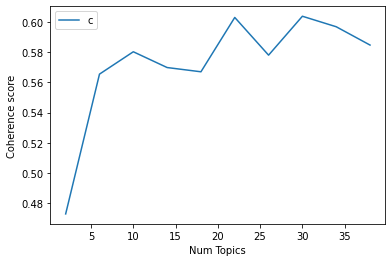

In [53]:
# use these values for the plot if compute_coherence_values takes too long to run 
# coherence_values = [0.5054, 0.5332, 0.5452, 0.564, 0.5678, 0.5518, 0.519]


x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [54]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.473
Num Topics = 6  has Coherence Value of 0.5654
Num Topics = 10  has Coherence Value of 0.5802
Num Topics = 14  has Coherence Value of 0.5698
Num Topics = 18  has Coherence Value of 0.567
Num Topics = 22  has Coherence Value of 0.603
Num Topics = 26  has Coherence Value of 0.578
Num Topics = 30  has Coherence Value of 0.6038
Num Topics = 34  has Coherence Value of 0.5968
Num Topics = 38  has Coherence Value of 0.5847


In [49]:
# Select the model and print the topics
optimal_model = model_list[np.where(np.array(x)==14)[0][0]]
# optimal_model =  models.LdaModel.load('optimal_model.model')
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.031*"drive" + 0.010*"disk" + 0.009*"system" + 0.009*"car" + 0.009*"scsi" '
  '+ 0.009*"use" + 0.008*"hard" + 0.007*"work" + 0.007*"power" + 0.007*"dos"'),
 (1,
  '0.016*"space" + 0.007*"year" + 0.006*"launch" + 0.006*"program" + '
  '0.005*"university" + 0.005*"new" + 0.005*"nasa" + 0.005*"work" + '
  '0.005*"president" + 0.005*"earth"'),
 (2,
  '0.013*"go" + 0.011*"people" + 0.009*"time" + 0.009*"say" + 0.008*"get" + '
  '0.008*"want" + 0.008*"thing" + 0.008*"come" + 0.007*"good" + 0.007*"right"'),
 (3,
  '0.011*"state" + 0.007*"gun" + 0.007*"law" + 0.007*"government" + '
  '0.007*"people" + 0.006*"right" + 0.005*"use" + 0.005*"israel" + '
  '0.005*"case" + 0.005*"report"'),
 (4,
  '0.022*"wire" + 0.011*"grind" + 0.009*"circuit" + 0.008*"edu" + '
  '0.006*"neutral" + 0.006*"chz" + 0.005*"bank" + 0.005*"gordon" + '
  '0.005*"current" + 0.005*"pitt"'),
 (5,
  '0.024*"file" + 0.017*"edu" + 0.011*"program" + 0.010*"com" + 0.008*"mail" + '
  '0.008*"list" + 0.007*"window" + 0.007

In [60]:
pprint(', '.join(df.lemmas.iloc[1]))
doc_lda = lda_multicore[corpus]
doc_lda[1][0]

('fair, numb, brave, soul, upgrade, clock, oscillator, share, experience, '
 'poll, send, brief, message, detail, experience, procedure, speed, attain, '
 'cpu, rate, speed, add, card, adapter, heat, sink, hour, usage, day, floppy, '
 'disk, functionality, floppy, especially, request, summarize, day, add, '
 'network, knowledge, base, clock, upgrade, haven, answer, poll, thank')


[(4, 0.09227603),
 (7, 0.33894992),
 (9, 0.23398502),
 (14, 0.11904929),
 (17, 0.16868949),
 (18, 0.032466915)]

# Appendix

### Bertopic 

In [ ]:
https://pypi.org/project/bertopic/
https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

## LDA with Anchor

In [ ]:
!pip install corextopic
 
from corextopic import corextopic as ct
from corextopic import vis_topic as vt # jupyter notebooks will complain matplotlib is being loaded twice
 
vectorizer = vectorizer.fit(data)
tfidf = vectorizer.transform(data)
vocab = vectorizer.get_feature_names()

anchors = []
anchors = [
    [a for a in topic if a in vocab]
    for topic in anchors
]

model = ct.Corex(n_hidden=8, seed=42)
ss_ldamodel_Anchor = model.fit(
    tfidf,
    words=vocab,
    anchors=anchors, # Pass the anchors in here
    anchor_strength = 4 # Tell the model how much it should rely on the anchors
)